Problem Statement

Ahmedabad Smart Toilets generate usage and failures data. The goal is to analyze usage patterns, identify frequent failures causes, and uncover operational inefficiencis to help improve maintenance and availability 

Objectives
- Understand usage trends
- Detect peak usage periods
- Analyze failure frequency & causes
- Find relationship between usage and failures
- Generate actionable insights for city management


Dataset Description
- City: Ahmedabad
- Domain: Smart City / Public Infrastructure
- Period: August 2022
- Focus: Toilet usage + failure monitoring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_theme()

In [2]:
df = pd.read_csv(r"D:\Projects\ahmedabad-smart-toilet-eda\datasets\Ahmedabad_Smart_Toilet_Usage_and_Failures_for_Aug_2022.csv")

In [3]:
# Displaying the first few rows of the dataframe
df.head()

,Sl No,Device No,Location,Type,Usages,Power failure,Water failure
0,1,AMD001,Kankariya-Women,Female,8113,0,0
1,2,AMD002,Kankariya-Men,Male,7962,0,0
2,3,AMD003,Raj Palace-Women,Female,5027,0,0
3,4,AMD004,Raj Palace-Men,Male,15072,0,0
4,5,AMD005,Nehru Nagar-Women,Female,10895,0,0


In [4]:
df.shape

(58, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sl No          58 non-null     int64 
 1   Device No      58 non-null     object
 2   Location       58 non-null     object
 3   Type           58 non-null     object
 4   Usages         58 non-null     int64 
 5   Power failure  58 non-null     int64 
 6   Water failure  58 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 3.3+ KB


🧾 Columns Breakdown (Very Important)

Column	    Meaning

Sl No	Serial number (❌ analytical use nahi)

Device No	Unique toilet ID

Location	Toilet ka area + gender

Type	Male / Female

Usages	August month total usage count

Power failure	Power failure count (August)

Water failure	Water failure count (August)

In [6]:
df['Usages'].describe()

count       58.000000
mean      7596.706897
std       5992.068331
min          8.000000
25%       2329.500000
50%       6920.000000
75%      10639.000000
max      22855.000000
Name: Usages, dtype: float64

In [7]:
# Max usage vs Min usage
max_usage = df['Usages'].max()
min_usage = df['Usages'].min()
print(f"Maximum Usage: {max_usage}")
print(f"Minimum Usage: {min_usage}")


Maximum Usage: 22855
Minimum Usage: 8


In [8]:
# Means vs Medians
mean_usage = df['Usages'].mean()
median_usage = df['Usages'].median()
print(f"Mean Usage: {mean_usage}")
print(f"Median Usage: {median_usage}")
# There is an significant difference between mean and median, indicating potential outliers in the data.


Mean Usage: 7596.706896551724
Median Usage: 6920.0


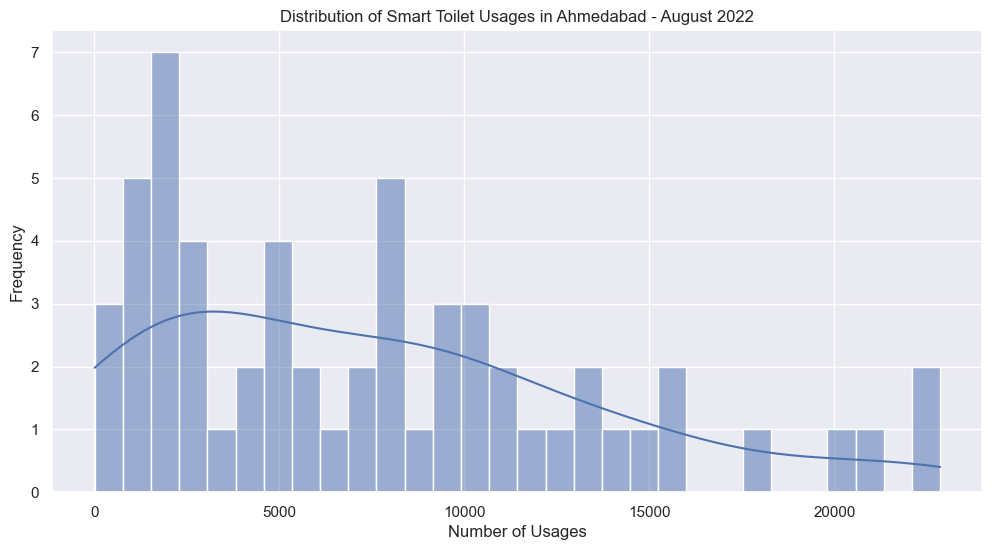

In [9]:
# Plotting the data
plt.figure(figsize=(12, 6))
sns.histplot(df['Usages'], bins=30, kde=True)
plt.title('Distribution of Smart Toilet Usages in Ahmedabad - August 2022')
plt.xlabel('Number of Usages')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Gender-Based Analysis
Male_usage = df[df['Type'] == 'Male']['Usages'].sum()
Female_usage = df[df['Type'] == 'Female']['Usages'].sum()
print(f"Total Male Usages: {Male_usage}")
print(f"Total Female Usages: {Female_usage}")


Total Male Usages: 285583
Total Female Usages: 155026


C:\Users\DIVYAM JAIN\AppData\Local\Temp\ipykernel_9656\617977098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Male', 'Female'],   y=[Male_usage,Female_usage], palette='pastel')


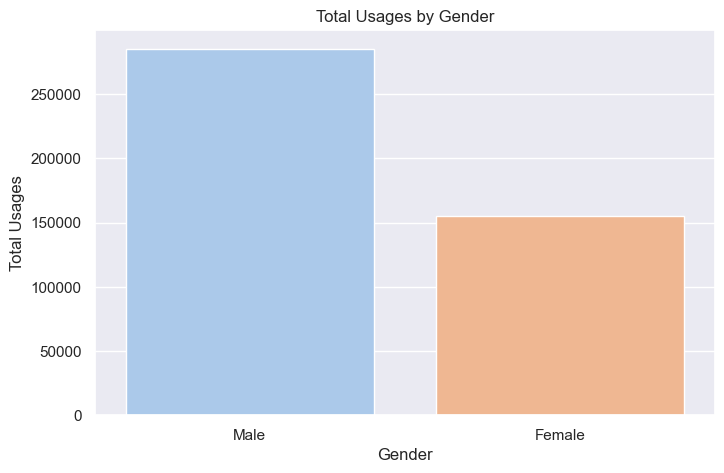

In [11]:
# Visualizing
plt.figure(figsize=(8, 5))
sns.barplot(x=['Male', 'Female'],   y=[Male_usage,Female_usage], palette='pastel')
plt.title('Total Usages by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Usages')
plt.show()

In [12]:
# power_counts = df['Power failure'].value_counts()
# print(power_counts)
# Which toilets had the highest failures?
result = df.loc[df['Power failure'] > 1, ['Location', 'Power failure']]
print(result)


Empty DataFrame
Columns: [Location, Power failure]
Index: []


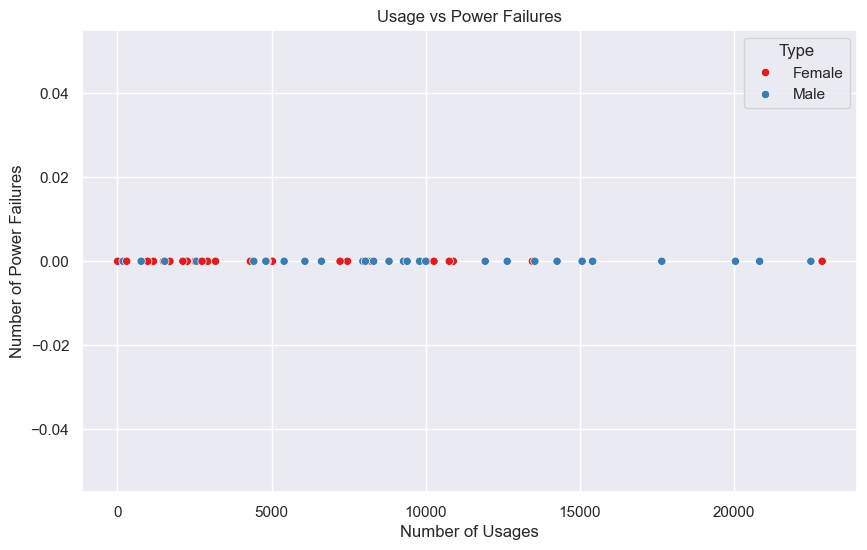

In [13]:
# Usage vs Failure Relationship
# Used scatter plot to visualize the relationship between usages and power failures
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Usages', y='Power failure', hue='Type', palette='Set1')
plt.title('Usage vs Power Failures')
plt.xlabel('Number of Usages')
plt.ylabel('Number of Power Failures')
plt.show()

In [14]:
# Location-Based Analysis
location_usage = df.groupby('Location')['Usages'].sum().reset_index()
location_usage = location_usage.sort_values(by='Usages', ascending=False)
print(location_usage.head(10))
print("\n", location_usage.tail(10))

                Location  Usages
23  Maneck Chowk - Women   22855
22    Maneck Chowk - Men   22490
12           Iscon - Men   20828
24       Nehru Nagar-Men   20044
44      Sola civil - Men   17655
34     Sadar bazar - Men   15432
54       Vastrapur - Men   15410
32        Raj Palace-Men   15072
46      Star bazar - Men   14259
18           Kargil -Men   13538

                Location  Usages
39         Shilaj-women    1705
50         Titanium-men    1538
11      Chharodi -women    1495
21    Keshavbaug -women    1171
51       Titanium-women     986
14  Jain Derasar- Women     967
30     RC TECHNICAL-men     772
31   RC TECHNICAl-women     303
6     CIMS HOSPITAL-men     186
7   CIMS HOSPITAL-women       8


Dataset contains monthly aggregated usage and failure counts per toilet

Usage distribution is highly skewed with few high-load toilets

Male toilets recorded higher total usage than female toilets

Further analysis required to normalize usage and relate failures

## DAY 2 - Failure Analysis (Power & Water)

"Both power and water failure columns contain only zero values across all toilets, indicating that data is either unavailable, not recorded, or that no failures occured during the observed period"

## DAY 3 - Usage Stress & Ranking Analysis

Today's Objective :
Identify high-load toilets and under-utilized toilets using normalized, decision-ready metrics.

In [15]:
# Percentile rank of usages
df['Usage Percentile'] = df['Usages'].rank(pct=True) * 100
df[['Location', 'Usages', 'Usage Percentile']].head()

,Location,Usages,Usage Percentile
0,Kankariya-Women,8113,58.620690
1,Kankariya-Men,7962,55.172414
2,Raj Palace-Women,5027,44.827586
3,Raj Palace-Men,15072,87.931034
4,Nehru Nagar-Women,10895,77.586207


In [16]:
# Ranking toilets based on usages
#-What is the Top 10% usage cutoff?
top_10_percentile_cutoff = df['Usages'].quantile(0.90)
print(f"Top 10% Usage Cutoff: {top_10_percentile_cutoff}")

Top 10% Usage Cutoff: 15416.6


In [17]:
# Toilets in the top 10% usage
top_10_percentile_toilets = df[df['Usages'] >= top_10_percentile_cutoff]
print(top_10_percentile_toilets[['Location', 'Usages']])

                Location  Usages
5        Nehru Nagar-Men   20044
7            Iscon - Men   20828
13      Sola civil - Men   17655
16  Maneck Chowk - Women   22855
17    Maneck Chowk - Men   22490
21     Sadar bazar - Men   15432


In [18]:
# If top 10% toilets handle a large share of total usage → load concentration problem.

In [19]:
# What % of total usage is handled by top 10% toilets?
total_usage = df['Usages'].sum()
top_10_usage = top_10_percentile_toilets['Usages'].sum()
percentage_top_10 = (top_10_usage / total_usage) * 100
print(f"Percentage of Total Usage Handled by Top 10% Toilets: {percentage_top_10}%")

Percentage of Total Usage Handled by Top 10% Toilets: 27.07706833042448%


In [20]:
# Is average usage per male toilet higher than average usage per female toilet?
average_usage_male = df[df['Type'] == 'Male']['Usages'].mean()
average_usage_female = df[df['Type'] == 'Female']['Usages'].mean()
print(f"Average Usage per Male Toilet: {average_usage_male}")
print(f"Average Usage per Female Toilet: {average_usage_female}")   

Average Usage per Male Toilet: 9847.689655172413
Average Usage per Female Toilet: 5345.724137931034


In [21]:
# Top-5 highest-usage toilets
top_5_toilets = df.nlargest(5, 'Usages')[['Location', 'Usages']]
print("Top 5 Highest-Usage Toilets:")
print(top_5_toilets)
bottom_5_toilets = df.nsmallest(5, 'Usages')[['Location', 'Usages']]
print("Bottom 5 Lowest-Usage Toilets:")
print(bottom_5_toilets)

Top 5 Highest-Usage Toilets:
                Location  Usages
16  Maneck Chowk - Women   22855
17    Maneck Chowk - Men   22490
7            Iscon - Men   20828
5        Nehru Nagar-Men   20044
13      Sola civil - Men   17655
Bottom 5 Lowest-Usage Toilets:
               Location  Usages
54  CIMS HOSPITAL-women       8
55    CIMS HOSPITAL-men     186
56   RC TECHNICAl-women     303
57     RC TECHNICAL-men     772
40  Jain Derasar- Women     967


In [22]:
# Under-Utilization Analysis
under_utilized_toilets = df[df['Usages'] < df['Usages'].mean()]
print("Under-Utilized Toilets:")
print(under_utilized_toilets[['Location', 'Usages']].head())



Under-Utilized Toilets:
                Location  Usages
2       Raj Palace-Women    5027
10  Prahladnagar - Women    7463
18         Nikol - Woman    4864
20   Sadar bazar - Women    4836
22         Zydus - Women    2121


## Day-4 -- Risk Categorization & Decision Framing 

Operational stress due to sustained usage load.

In [23]:
# High Stress Toilets
high_stress_toilets = df[df['Usages'] > df['Usages'].quantile(0.90)]
print("High Stress Toilets (Top 10% by Usage):")
print(high_stress_toilets[['Location', 'Usages']])


High Stress Toilets (Top 10% by Usage):
                Location  Usages
5        Nehru Nagar-Men   20044
7            Iscon - Men   20828
13      Sola civil - Men   17655
16  Maneck Chowk - Women   22855
17    Maneck Chowk - Men   22490
21     Sadar bazar - Men   15432


In [24]:
# The % of total usage is handled by top 10% toilets
total_usage = df['Usages'].sum()
top_10_usage = high_stress_toilets['Usages'].sum()
percentage_top_10 = (top_10_usage / total_usage) * 100
print(f"Percentage of Total Usage Handled by Top 10% Toilets: {percentage_top_10:.2f}%")

Percentage of Total Usage Handled by Top 10% Toilets: 27.08%


The top 10% of toilets handle approximately 27 % of total recorded usage, indicating a significant concecntration of deman across a small subset of infrastructure assets.

In [25]:
# Dividing categories based on usage levels
#High stress, medium stress, low stress toilets
high_stress_toilets = df[df['Usages'] > df['Usages'].quantile(0.90)]
medium_stress_toilets = df[(df['Usages'] <= df['Usages'].quantile(0.90)) & (df['Usages'] >= df['Usages'].quantile(0.10))]
low_stress_toilets = df[df['Usages'] < df['Usages'].quantile(0.10)]
print(f"Number of High Stress Toilets: {len(high_stress_toilets)}")
print(f"Number of Medium Stress Toilets: {len(medium_stress_toilets)}")
print(f"Number of Low Stress Toilets: {len(low_stress_toilets)}")


Number of High Stress Toilets: 6
Number of Medium Stress Toilets: 46
Number of Low Stress Toilets: 6


The majority of toilets fall into medium-stress category, suggesting that most infrastructure operates under normal demand conditions, while a small number of otilets require targeted attention at both extremes

### 5 Decision Framing

-High Stress Toilets:- requires capacity expansion or maintenance prioritization

-Medium Stress Toilets:- regular maintenance and monitoring

-Low Stress Toilets:- potential candidates for resource reallocation or repurposing


Limitations of Risk Categorization:
1. Dynamic Usage Patterns: Toilet usage can vary significantly based on time of day, events, and seasons, making static categorizations less effective.
2. External Factors: Factors such as maintenance schedules, cleanliness, and accessibility can influence usage but are not accounted for in simple usage-based risk categories.
3. Data Quality: Inaccuracies or gaps in usage data can lead to misclassification of toilets into risk categories.
4. Behavioral Aspects: User behavior and preferences may not align with usage statistics, affecting the perceived risk level.

## Day-5 -- Key Insights & Actionable Recommendations

Objective
Compress analysis into clear insights and realistic actions a decision-maker can use 

🔹Insight 1 -- Usage Concentration

A small subset of toilets handles a disproportionate share of total usage,with the top 10% accounting for approximately 27% of overall demand

Why these insight matters: Infrastructure stress is localized, not city-wide -- targeted intervention will be more effective than uniform upgrades.

🔹Insight 2 - System Stability with Stress Pockets

Most toilets fall into the medium-stress category, indicating generally stable usage patterns across the city

Why these insight matters:
City infrastructure is broadly adequate,but selective stress hotspots require focused attention

🔹 Insight 3 — High-Stress Toilets as Risk Indicators

High stress toilets are few in number but critical in impact due to sustained high usage.

Why it matters:
Failure at these locations would affect a disproportionately large number of users making them priority assets

🔹 Insight 4 — Underutilized Infrastructure

Low-stress toilets show consistently low usage, suggesting possible inefficiencies in placement or awareness

Why it matters: Underutilized assets represent sunk costs and opportunities for better resource allocation

🔹 Insight 5 — Limits of Failure Visibility

The absence of recorded power or water failures limits valiadation of usage-based risk against actual breakdowns

Why it matters: Decision-making must rely on preventive risk signals rather than reactive failure data

✅ ACTIONABLE RECOMMENDATIONS

🔴 For High-Stress Toilets

Increase cleaning and inspection frequency

Assign priority maintenance schedules

Monitor usage trends monthly for early warning signs

🟡 For Medium-Stress Toilets

Maintain current service levels

Periodically reassess usage classification

Use as baseline performance benchmarks

🟢 For Low-Stress Toilets

Review location relevance and accessibility

Consider relocation, consolidation, or signage improvements

Investigate non-usage causes before expansion decisions